In [2]:
import os
import sys
import glob
import pandas as pd
import re

from astropy.io.fits.header import Header

data_folder = "/user/simon/data/soar/header_samples"

file_list = glob.glob(os.path.join(data_folder,
                                   "headers/red/*red.txt"))

In [3]:
all_keywords = []
all_dates = []

for _file in sorted(file_list):
    _date = re.sub('-header_red.txt', '', os.path.basename(_file))
    if _date not in all_dates:
        all_dates.append(_date)
    with open(_file, 'r') as f:
        h = Header.fromtextfile(f)
        for key in h.keys():
            if key not in all_keywords:
                all_keywords.append(key)
print(all_keywords)
print(all_dates)


['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'BSCALE', 'BZERO', 'DATE-OBS', 'DATE', 'TIME', 'N_PRM0', 'PG0_0', 'PG0_1', 'PG0_2', 'PG0_3', 'PG0_4', 'PG0_5', 'PG0_6', 'PG0_7', 'PG0_8', 'PG0_9', 'PG0_10', 'PG0_11', 'PG0_12', 'PG0_13', 'PG0_14', 'PG0_15', 'PG0_16', 'PG0_17', 'PG0_18', 'PG0_19', 'PG0_20', 'PG0_21', 'PG0_22', 'PG0_23', 'PG0_24', 'PG0_25', 'PG0_26', 'PG0_27', 'PG0_28', 'PG0_29', 'PG0_30', 'PG0_31', 'PG0_32', 'PG0_33', 'PG0_34', 'PG0_35', 'PG0_36', 'PG0_37', 'PG0_38', 'PG0_39', 'PG0_40', 'PG0_41', 'PG0_42', 'PG0_43', 'PG0_44', 'PG0_45', 'PG0_46', 'PG0_47', 'PG0_48', 'PG0_49', 'PG0_50', 'PG0_51', 'PG0_52', 'PG0_53', 'PG0_54', 'PG0_55', 'PG0_56', 'PG0_57', 'PG0_58', 'N_PRM1', 'PG1_0', 'PG1_1', 'PG1_2', 'PG1_3', 'PG1_4', 'PG1_5', 'PG1_6', 'PG1_7', 'PG1_8', 'PG1_9', 'N_PRM2', 'PG2_0', 'PG2_1', 'PG2_2', 'PG2_3', 'PG2_4', 'PG2_5', 'PG2_6', 'PG2_7', 'PG2_8', 'PG2_9', 'PG2_10', 'PG2_11', 'PG2_12', 'PG2_13', 'PG2_14', 'PG2_15', 'PG2_16', 'PG2_17', 'PG2_18', 'PG2_19', 'PG2_20', 'PG

In [17]:
df = pd.DataFrame(columns=all_keywords, index=all_dates)
# df.insert(0, 'dates', all_dates, True)
df = df.fillna(False)
# print(df)
for _file in sorted(file_list):
    _date = re.sub('-header_red.txt', '', os.path.basename(_file))
    with open(_file, 'r') as f:
        h = Header.fromtextfile(f)
        for key in h.keys():
            df.at[_date, key] = True
# print(df.to_string())
# print(df.all().to_string())
# print(df[~df.all()].to_string())

In [18]:
for column in all_keywords:
    if df[column].all():
        df = df.drop(columns=[column])

In [19]:
pd.set_option('display.max_rows', len(df))
df

,OPENDATE,OPENTIME,CLOSETIM,PG2_23,PG2_24,PG4_54,PG4_55,PG4_56,PG4_57,PG4_58,...,CONFID,REQNUM,PROPID,SITEID,TELID,RLEVEL,BLKUID,L1PUBDAT,IMAGEID,HEADERVE
2016-10-13,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-10-14,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-10-15,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-10-16,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-10-17,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-10-18,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-10-21,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-10-22,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-11-03,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2016-11-06,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
filtered_keys = list(df.columns)

for key in filtered_keys[1::]:
    print(" ")
    previous_state=None
    for index, row in df.iterrows():
        if previous_state is None:
            previous_state=row[key]
        elif row[key] != previous_state :
            print(f"{key} changed from {previous_state} to {row[key]} {index}")
            previous_state=row[key]

 
OPENTIME changed from False to True 2016-12-22
OPENTIME changed from True to False 2017-01-30
OPENTIME changed from False to True 2017-01-31
OPENTIME changed from True to False 2017-03-15
OPENTIME changed from False to True 2017-03-27
OPENTIME changed from True to False 2017-05-29
OPENTIME changed from False to True 2017-06-03
OPENTIME changed from True to False 2017-06-13
OPENTIME changed from False to True 2017-06-15
OPENTIME changed from True to False 2017-06-23
OPENTIME changed from False to True 2017-07-03
OPENTIME changed from True to False 2017-07-22
OPENTIME changed from False to True 2017-07-24
OPENTIME changed from True to False 2017-08-25
OPENTIME changed from False to True 2017-08-27
OPENTIME changed from True to False 2017-10-04
OPENTIME changed from False to True 2017-10-15
OPENTIME changed from True to False 2017-10-20
OPENTIME changed from False to True 2017-10-21
OPENTIME changed from True to False 2017-10-28
OPENTIME changed from False to True 2017-10-29
OPENTIME ch

 
PG4_56 changed from False to True 2017-04-10
 
PG4_57 changed from False to True 2017-04-10
 
PG4_58 changed from False to True 2017-04-10
 
LAMP_HGA changed from False to True 2018-03-28
LAMP_HGA changed from True to False 2018-04-04
LAMP_HGA changed from False to True 2018-04-16
 
LAMP_NE changed from False to True 2018-03-28
LAMP_NE changed from True to False 2018-04-04
LAMP_NE changed from False to True 2018-04-16
 
LAMP_AR changed from False to True 2018-03-28
LAMP_AR changed from True to False 2018-04-04
LAMP_AR changed from False to True 2018-04-16
 
LAMP_FE changed from False to True 2018-03-28
LAMP_FE changed from True to False 2018-04-04
LAMP_FE changed from False to True 2018-04-16
 
LAMP_CU changed from False to True 2018-03-28
LAMP_CU changed from True to False 2018-04-04
LAMP_CU changed from False to True 2018-04-16
 
LAMP_QUA changed from False to True 2018-03-28
LAMP_QUA changed from True to False 2018-04-04
LAMP_QUA changed from False to True 2018-04-16
 
LAMP_BUL ch

In [14]:
ar = df.to_numpy()

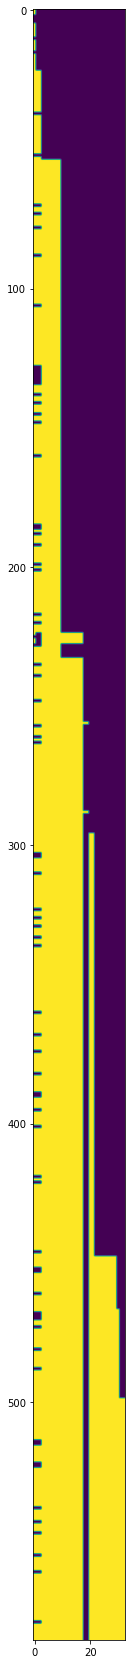

In [15]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(40, 30))
ax.imshow(ar, interpolation=None)
plt.savefig('./test.png')